# Faster-RCNN 구현
http://incredible.ai/deep-learning/2018/03/17/Faster-R-CNN/
1. Bounding Box Regression 식 질문

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

## Example Box(Ground Truth)
예시로 2개의 상자(bbox) 생성
- 물체가 있다고 가정
- Input image size는 800x800x3(RGB)
- sub_sample의 크기 16x16

In [2]:
# example image
image = torch.zeros((1, 3, 800, 800)).float()
image_size = (800, 800)

# example bbox
# x1, y1, x2, y2
bbox = torch.FloatTensor([[20, 30, 300, 400], [400, 300, 600, 500]])
labels = torch.LongTensor([6,8])

sub_sample = 16

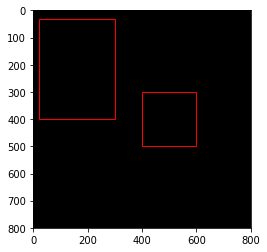

In [3]:
# 시각화
tensor = image
tensor = tensor.squeeze()
tensor = tensor.permute(1,2,0)
img = np.array(tensor)

fig, ax = plt.subplots()
ax.imshow(img)


rect1 = patches.Rectangle((20, 30), 280, 370, facecolor='none', edgecolor='r')
rect2 = patches.Rectangle((400, 300), 200, 200, facecolor='none', edgecolor='r')

ax.add_patch(rect1)
ax.add_patch(rect2)

## Feature Extraction
Faster-RCNN의 구조 중 첫 번째인 feature map을 생성하는 부분
- Input Image의 사이즈는 (800 x 800)
- feature map(CNN 결과)의 사이즈는 (50 x 50)
- 모델은 VGG16(논문에 따라)

In [6]:
a = np.array([[1,2,3,4], [5,6,7,8]])
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [8]:
a.shape

(2, 4)

In [11]:
a.reshape(-1,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])